## Observations and Insights 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df=pd.merge(mouse_metadata,study_results,on="Mouse ID",how="right")

In [6]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [35]:
# of mouses under each regimen
mouse_metadata.groupby("Drug Regimen").count()

,Mouse ID,Sex,Age_months,Weight (g)
Drug Regimen,,,,
Capomulin,25,25,25,25
Ceftamin,25,25,25,25
Infubinol,25,25,25,25
Ketapril,25,25,25,25
Naftisol,25,25,25,25
Placebo,25,25,25,25
Propriva,25,25,25,25
Ramicane,25,25,25,25
Stelasyn,24,24,24,24


In [7]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [8]:
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
#longer period of time
max(data_df['Timepoint'])

45

In [10]:
# Checking the number of mice in the DataFrame.
total_mice = len(data_df)
number_of_mices = data_df['Mouse ID'].nunique()
number_of_mices

249

In [11]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = data_df[data_df.duplicated(['Mouse ID','Timepoint'])]
duplicated_mice["Mouse ID"].unique()

array(['g989'], dtype=object)

In [12]:
# Optional: Get all the data for the duplicate mouse ID. 
data_df.loc[data_df["Mouse ID"]==duplicated_mice["Mouse ID"].unique()[0]]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df = data_df.loc[data_df["Mouse ID"]!=duplicated_mice["Mouse ID"].unique()[0]]

In [14]:
# Checking the number of mice in the clean DataFrame.
cleaned_data_df["Mouse ID"].nunique()

248

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

In [16]:
summary_table = cleaned_data_df.groupby(by='Drug Regimen')
summary_table_df = pd.DataFrame({"Mean Tumor Volume": summary_table['Tumor Volume (mm3)'].mean().round(decimals=2),
                                "Median Tumor Volume": summary_table['Tumor Volume (mm3)'].median().round(decimals=2),
                                "Tumor Volume Variance":summary_table['Tumor Volume (mm3)'].var().round(decimals=2),
                                "Tumor Volume Std. Dev.":summary_table['Tumor Volume (mm3)'].std(ddof=1).round(decimals=2),
                                "Tumor Volume Std. Err.":summary_table['Tumor Volume (mm3)'].sem().round(decimals=2)})
summary_table_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

summary_table = cleaned_data_df.groupby(by='Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

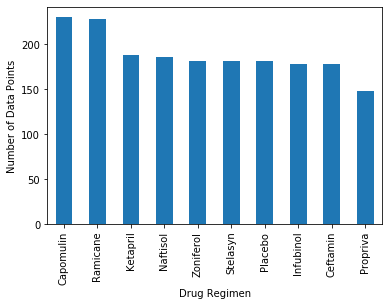

In [18]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

points_bar_chart = cleaned_data_df.groupby(by='Drug Regimen')['Timepoint'].count().sort_values(ascending=False).plot(kind='bar')
points_bar_chart.set_ylabel("Number of Data Points")
plt.show()


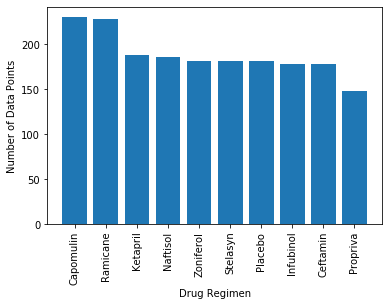

In [19]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

y = cleaned_data_df.groupby(by='Drug Regimen')['Timepoint'].count().sort_values(ascending = False)
x = y.index.values.tolist()

plt.bar(x,y)
plt.xticks(rotation = "vertical")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()



## Pie Plots

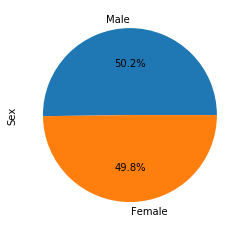

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Sex_pie_chart = data_df.groupby(by='Sex')["Mouse ID"].nunique().sort_values(ascending=False).plot(kind='pie',autopct='%1.1f%%')
Sex_pie_chart.set_ylabel("Sex")
plt.show()


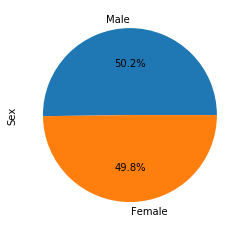

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_data = data_df.groupby(by='Sex')["Mouse ID"].nunique().sort_values(ascending=False)
pie_labels =  pie_data.index.values.tolist()
plt.pie(pie_data, autopct ='%1.1f%%',labels = pie_labels)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
summary_table_df.sort_values(by="Tumor Volume Std. Err.")

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Ramicane,40.22,40.67,23.49,4.85,0.32
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Zoniferol,53.24,51.82,48.53,6.97,0.52
Propriva,52.32,50.45,43.85,6.62,0.54
Stelasyn,54.23,52.43,59.45,7.71,0.57
Placebo,54.03,52.29,61.17,7.82,0.58
Ketapril,55.24,53.70,68.55,8.28,0.60


In [23]:
sorted_cleaned= cleaned_data_df.sort_values(by=['Mouse ID', 'Timepoint'])

last_tumor = sorted_cleaned.drop_duplicates('Mouse ID', keep='last')

Ramicane_df = last_tumor.loc[last_tumor['Drug Regimen']=="Ramicane"]
Capomulin_df = last_tumor.loc[last_tumor['Drug Regimen']=="Capomulin"]
Ceftamin_df = last_tumor.loc[last_tumor['Drug Regimen']=="Ceftamin"]
Infubinol_df = last_tumor.loc[last_tumor['Drug Regimen']=="Infubinol"]

In [24]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [25]:
#Ramicane
Ramicane_values = Ramicane_df['Tumor Volume (mm3)']
quartiles = Ramicane_values.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

Ramicane_Outliers = Ramicane_values.loc[(Ramicane_values>upper_bound)|(Ramicane_values<lower_bound)]
print(f"Ramicane potential outliers: {Ramicane_Outliers}")

Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [26]:
#Capomulin
Capomulin_values = Capomulin_df['Tumor Volume (mm3)']
quartiles = Capomulin_values.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

Capomulin_Outliers = Capomulin_values.loc[(Capomulin_values>upper_bound)|(Capomulin_values<lower_bound)]
print(f"Capomulin potential outliers: {Capomulin_Outliers}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [27]:
#Ceftamin
Ceftamin_values = Ceftamin_df['Tumor Volume (mm3)']
quartiles = Ceftamin_values.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

Ceftamin_Outliers = Ceftamin_values.loc[(Ceftamin_values>upper_bound)|(Ceftamin_values<lower_bound)]
print(f"Ceftamin potential outliers: {Ceftamin_Outliers}")

Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [28]:
#Infubinol
Infubinol_values = Infubinol_df['Tumor Volume (mm3)']
quartiles = Infubinol_values.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

Infubinol_Outliers = Infubinol_values.loc[(Infubinol_values>upper_bound)|(Infubinol_values<lower_bound)]
print(f"Infubinol potential outliers: {Infubinol_Outliers}")

Infubinol potential outliers: 669    36.321346
Name: Tumor Volume (mm3), dtype: float64


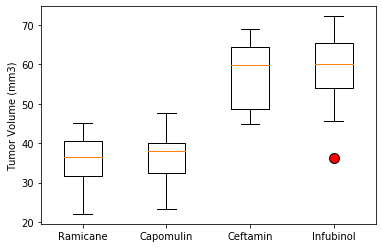

In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
x_val = ["Ramicane","Capomulin","Ceftamin","Infubinol"]
red_circle = dict(markerfacecolor='r', marker='o',markersize='10')
fig1, ax1 = plt.subplots()
plt.boxplot([Ramicane_values,Capomulin_values,Ceftamin_values,Infubinol_values],flierprops=red_circle)
plt.xticks([1, 2, 3,4], x_val)
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [30]:
Capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
309,b128,Capomulin,Female,9,22,45,38.982878,2
299,b742,Capomulin,Male,7,21,45,38.939633,0
64,f966,Capomulin,Male,16,17,20,30.485985,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
360,g316,Capomulin,Female,22,22,45,40.159220,2


In [31]:
mouse_capomulin = data_df.loc[data_df['Mouse ID']=="b128"]
time = mouse_capomulin["Timepoint"]
tumorV = mouse_capomulin["Tumor Volume (mm3)"]

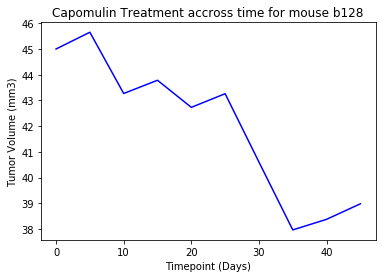

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

plt.plot(time,tumorV, color = 'blue')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment accross time for mouse b128')
plt.show()

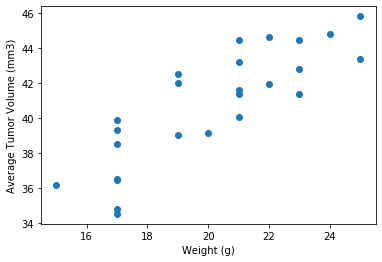

In [33]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_data = data_df.loc[data_df["Drug Regimen"]=="Capomulin"]
capomulin_group = Capomulin_data.groupby('Mouse ID')
graph_var = capomulin_group.mean()
x=graph_var['Weight (g)']
y=graph_var['Tumor Volume (mm3)']
plt.scatter(x,y)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


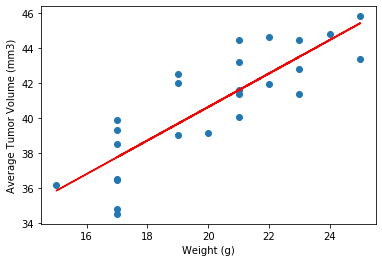

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue,pvalue,stderr)= linregress(x,y)
regress_values = x*slope + intercept

correlation = st.pearsonr(x,y)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

plt.scatter(x,y)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(x,regress_values,'-r')
plt.show()
